In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 46 kB 2.1 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [73]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["lines.linewidth"] = 5.0

# 1. ARIMA

In [5]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
visadf = yf.download("V", start="2017-01-01", progress=False)
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
fiservdf = yf.download("FISV", start="2017-01-01", progress=False)
paypaldf = yf.download("PYPL", start="2017-01-01", progress=False)

In [6]:
amexdf.head(3)
visadf.head(3)
mastercarddf.head(3)
fiservdf.head(3)
paypaldf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781242,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925209,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050949,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844193,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472481,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381096,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280396,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250893,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048363,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,53.41,53.845001,53.244999,53.669998,53.669998,2142600
2017-01-04,53.66,54.365002,53.654999,54.325001,54.325001,1359000
2017-01-05,54.23,54.590000,54.005001,54.305000,54.305000,1662400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.290001,40.980000,40.000000,40.250000,40.250000,8247400
2017-01-04,40.349998,41.029999,40.044998,41.000000,41.000000,6806400
2017-01-05,41.430000,41.720001,41.040001,41.060001,41.060001,6432000


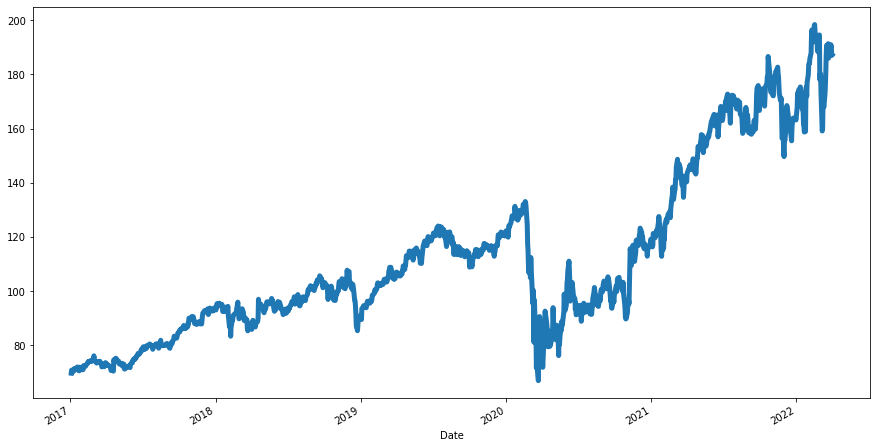

In [7]:
amexdf["Adj Close"].plot()

In [8]:
amexdf.isnull().sum().sum()

0

In [9]:
amexdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1.322000e+03
mean,115.912050,117.084478,114.702943,115.898986,112.497113,3.892311e+06
std,30.126447,30.494174,29.749236,30.111686,31.563775,1.897569e+06
min,72.540001,75.419998,67.000000,68.959999,67.033676,7.070000e+05
25%,95.067497,96.274998,93.890001,95.184999,91.283361,2.735150e+06
50%,106.825001,107.835003,106.250000,106.855000,102.765263,3.361100e+06
75%,126.962503,128.044998,126.382500,127.180002,123.582645,4.422100e+06
max,197.500000,199.550003,197.240005,198.380005,198.380005,1.726170e+07


In [10]:
# ril_monthly_df = rildf.resample("1m").mean().sort_values(by="Date", ascending=False)
amex_monthly_df = amexdf.resample("1m").mean()
amex_monthly_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,76.532000,77.120500,75.928000,76.501500,71.134923,5.195245e+06
2017-02-28,78.704211,79.168947,78.346842,78.858949,73.342339,3.464032e+06
2017-03-31,79.118261,79.640869,78.648260,79.076086,73.544287,4.291339e+06


In [11]:
# amex_monthly_df['Adj Close'].plot()

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12)
# figure = decomposition.plot()
# plt.show()

In [13]:
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781242,5853900,NaN
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925209,4635800,0.016261
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050949,3383000,-0.012403


In [14]:
amexdf.dropna(inplace=True)

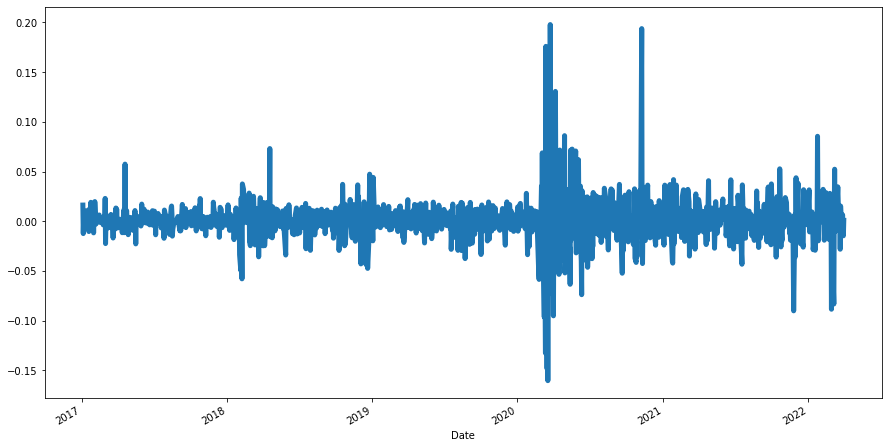

In [15]:
amexdf.Return.plot()

In [16]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12, model="multiplicative")
# figure = decomposition.plot()
# plt.show()

In [17]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Return"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Return"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Return"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Return"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (22351.790314380458, 0.0)
AndersonResult(statistic=48.91006897354782, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.46809056122589304, pvalue=7.21777219202825e-266)
ShapiroWilkTest 0.8045112490653992 3.2909615506855647e-37


In [18]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Adj Close"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Adj Close"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Adj Close"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Adj Close"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (177.81679779437673, 0.0)
AndersonResult(statistic=47.5424022792331, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.8999810814857483 1.6450918028616613e-28


In [19]:
# from numpy.random import randn
# data = 5 * randn(100) + 5

In [20]:
# # Tests of Normality
# import scipy.stats as ss

# # Jarque–Bera Test
# statistic = ss.jarque_bera(data)
# print("JarqueBeraTest", statistic)

# # Anderson-Darling Normality Test
# statistic = ss.anderson(data)
# print(statistic)

# # Kolmogorov-Smirnov Test
# statistic = ss.kstest(data, 'norm')
# print(statistic)

# # Shapiro-Wilk Test
# statistic, pvalue = ss.shapiro(data)
# print(f"ShapiroWilkTest ({statistic}, {pvalue})")

In [21]:
# Tests of Stationarity
from statsmodels.tsa import stattools
from statsmodels.stats import diagnostic

# Augmented Dickey Fuller Test
statistic = stattools.adfuller(amexdf["Return"])
print("AugmentedDickeyFullerTest", statistic)

# Ljung-Box Test (test for auto-correlation)
statistic = diagnostic.acorr_ljungbox(amexdf["Return"], lags=[1])
print("LjungboxTest", statistic)

AugmentedDickeyFullerTest (-14.65092518192403, 3.5015512758308734e-27, 6, 1314, {'1%': -3.435336393256612, '5%': -2.863742089354917, '10%': -2.5679424031562683}, -6308.791308895571)
LjungboxTest     lb_stat  lb_pvalue
1  8.982502   0.002726


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


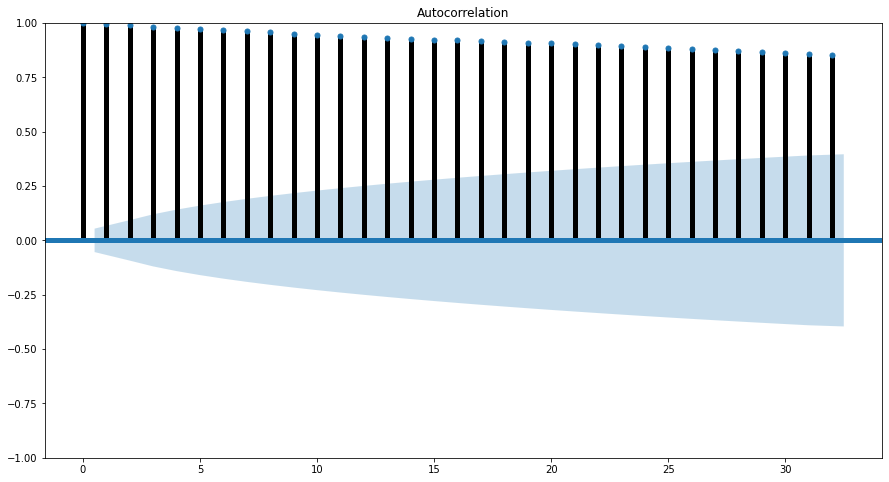

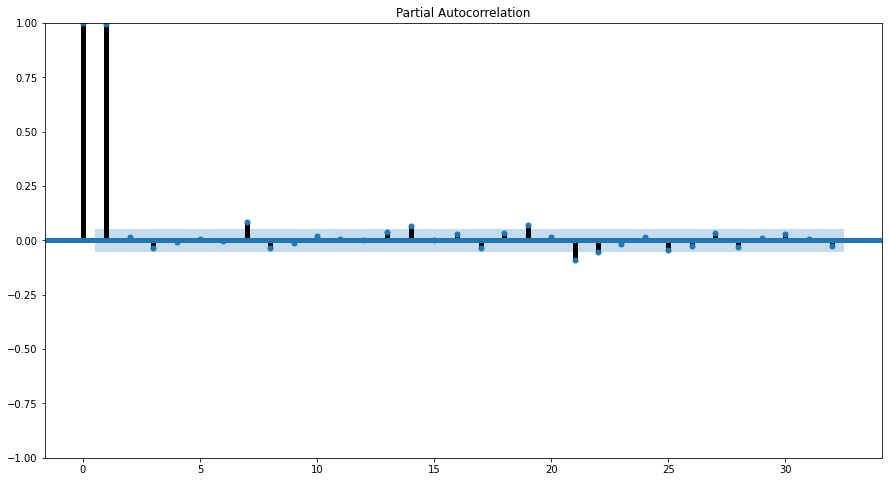

In [22]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Adj Close"])
pacf = sgt.plot_pacf(amexdf["Adj Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


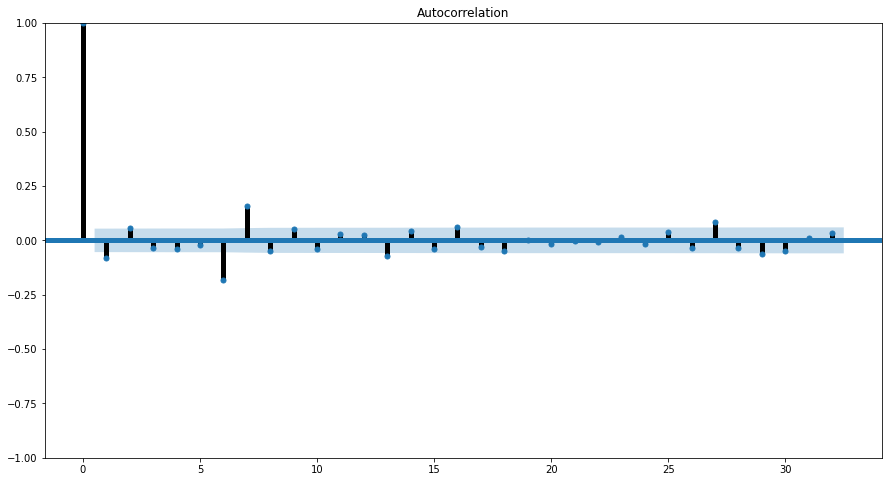

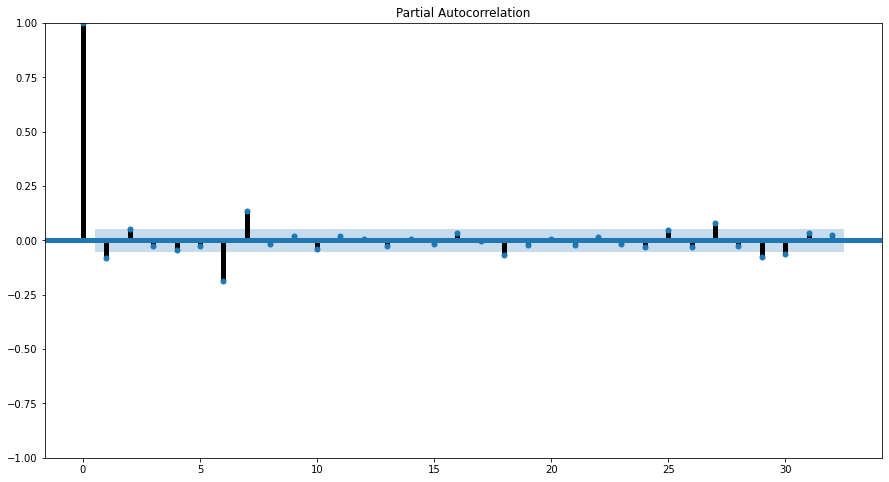

In [23]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Return"])
pacf = sgt.plot_pacf(amexdf["Return"])

In [24]:
# normal transformation
box_data, box_lambda = ss.boxcox(amexdf["Adj Close"])
yeo_data, yeo_lambda = ss.yeojohnson(amexdf["Return"])

print(f"old adjusted close skew: {ss.skew(amexdf['Adj Close'])} old kurtosis: {ss.kurtosis(amexdf['Adj Close'])}")
print(f"old return skew: {ss.skew(amexdf['Return'])} old kurtosis: {ss.kurtosis(amexdf['Return'])}")
print(f"box skew: {ss.skew(box_data)} old kurtosis: {ss.kurtosis(box_data)}")
print(f"yeo skew: {ss.skew(yeo_data)} old kurtosis: {ss.kurtosis(yeo_data)}")

old adjusted close skew: 0.8933805053945619 old kurtosis: -0.19511628432267436
old return skew: 0.7117946022598312 old kurtosis: 20.10129196032119
box skew: 0.06518147694312322 old kurtosis: -0.7643564860738943
yeo skew: -0.15080059435110324 old kurtosis: 18.005380915170726


In [25]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(box_data)
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(box_data)
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(box_data, 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(box_data)
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (33.09299503760272, 6.51549525443329e-08)
AndersonResult(statistic=9.626607987775515, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.8631659227133502, pvalue=0.0)
ShapiroWilkTest 0.9693179130554199 3.9932486854643253e-16


In [26]:
# import pmdarima as pmd
# model = pmd.auto_arima(rildf["Return"], max_p=10, max_q=10, max_d=3, max_order=20)
# model.summary()
# import pmdarima as pmd
# yeo_model = pmd.auto_arima(yeo_data, max_p=10, max_q=10, max_d=3, max_order=20)
# yeo_model.summary()
# import pmdarima as pmd
# box_model = pmd.auto_arima(box_data, max_p=10, max_q=10, max_d=3, max_order=20)
# box_model.summary()
# model.predict(n_periods=10)
# infy_df.reset_index(inplace=True)

In [27]:
# cutoff_date = '2021-12-31'
# xtrain, xtest = amexdf.loc[amexdf.index <= cutoff_date], amexdf.loc[amexdf.index > cutoff_date]

In [28]:
import pmdarima as pmd

maxlen = len(amexdf)
forecast1 = []

for ii in range(30):
  train_model = pmd.auto_arima(amexdf[ii:ii+maxlen-30]["Adj Close"], max_p=5, max_q=5, max_d=2, max_order=11)
  train_model.fit(amexdf[ii:ii+maxlen-30]["Adj Close"])
  forecast1.append(train_model.predict(n_periods=1).item())


ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 5), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

In [29]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast1, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.29


In [30]:
# import pmdarima as pmd
# train_model = pmd.auto_arima(amexdf[:-30]["Adj Close"], max_p=10, max_q=10, max_d=3, max_order=20)
# train_model.fit(amexdf[:-30]["Adj Close"])
# train_model.summary()

In [31]:
# forecast1 = train_model.predict(n_periods=30)

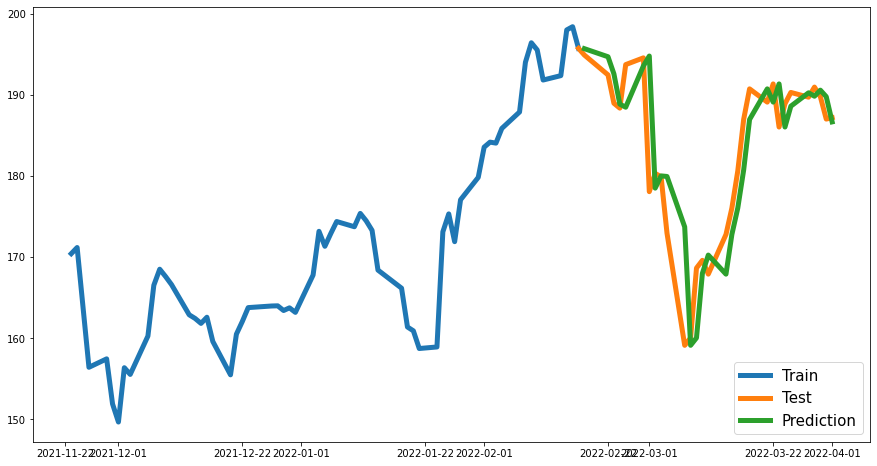

In [32]:
forecast1 = pd.DataFrame(forecast1, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast1, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [33]:
# xresiduals = xtest["Return"].values - forecast["Prediction"].values

In [34]:
# _ = sgt.plot_acf(xresiduals, lags=15)
# _ = sgt.plot_pacf(xresiduals, lags=15)


In [35]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit1 = ExponentialSmoothing(xtrain["Adj Close"], seasonal_periods=52, trend='mul', seasonal='mul')
# fit1 = fit1.fit()
# prediction = fit1.forecast(len(xtest)).copy()
# xresiduals = xtest["Adj Close"].values - prediction

In [36]:
# # fit1.params_formatted
# xtest.shape[0]/xtrain.shape[0]

In [37]:
# sgt.plot_acf(xresiduals, lags=15);
# sgt.plot_pacf(xresiduals, lags=15);

In [38]:
# prediction = pd.DataFrame(prediction.values, index = xtest.index, columns=['Prediction'])

In [39]:
# plt.plot(xtrain["Adj Close"], label="Train")
# plt.plot(xtest["Adj Close"], label="Test")
# plt.plot(prediction, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

In [40]:
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(xtest["Return"], forecast["Prediction"], squared=False)
# print(f"RMSE={rmse*100:.4f}%")

# 2. VAR

In [41]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [42]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781250,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925186,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050964,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581007,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679935,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [43]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf

,amex price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,117.484962,1788.199951,0.903310,1.926,23.581007
2019-11-08,117.669022,1785.880005,0.907466,1.933,23.679935
2019-11-11,117.116859,1771.650024,0.907240,1.943,23.650730
2019-11-12,117.107162,1778.000000,0.906170,1.909,23.698780
2019-11-13,116.496887,1753.109985,0.908070,1.870,23.698780
...,...,...,...,...,...
2022-03-28,189.699997,3379.810059,0.910590,2.477,34.250000
2022-03-29,190.940002,3386.300049,0.909600,2.400,34.779999
2022-03-30,189.759995,3326.020020,0.901590,2.358,34.549999


In [44]:
from statsmodels.tsa.vector_ar.var_model import VAR

maxlen = len(masterdf)
forecast2 = []

for ii in range(30):
  df = masterdf[ii:ii+maxlen-30]
  train_model = VAR(df)
  result = train_model.select_order(maxlags=10)
  result = train_model.fit(maxlags=result.aic)
  lagged_Values = df.values[-result.k_ar:]
  forecast2.append(result.forecast(y=lagged_Values, steps=1)[0][0])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [45]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(masterdf[-30:]["amex price"], forecast2, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.36


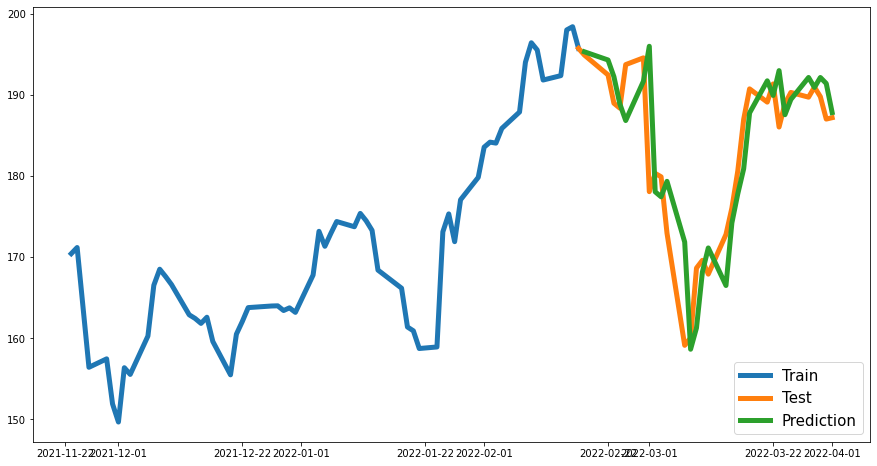

In [46]:
forecast2 = pd.DataFrame(forecast2, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast2, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [47]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# # masterdf = np.log(masterdf).diff(1).dropna()
# # masterdf
# model = VAR(masterdf[:-30])
# result = model.select_order(maxlags=10)
# result.summary()
# result = model.fit(maxlags=result.aic)
# # result.summary()
# lagged_Values = masterdf.values[-result.k_ar:]

# forecast2 = result.forecast(y=lagged_Values, steps=30) 
# forecast2 = pd.DataFrame(forecast2[:,0], index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])

# plt.plot(amexdf[-90:-29]["Adj Close"], label="Train")
# plt.plot(amexdf[-30:]["Adj Close"], label="Test")
# plt.plot(forecast2, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

# 3. Deep Learning - LSTM

In [48]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.dropna(inplace=True)
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925209,4635800,0.016260
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050957,3383000,-0.012403
2017-01-06,75.400002,75.919998,75.059998,75.470001,70.190468,3089600,0.001990


In [49]:
import torch

def sliding_window(ts, window_size=10):
  X = []
  Y = []
  ts = ts.tolist()

  for ii in range(window_size+1, len(ts)+1):
    X.append(ts[ii-(window_size+1):ii-1])
    Y.append(ts[ii-1])

  return torch.Tensor(X), torch.Tensor(Y)

In [50]:
xtrain, ytrain = sliding_window(amexdf["Adj Close"])

In [51]:
ytrain

tensor([ 71.3251,  70.8694,  70.6555,  ..., 189.7600, 187.0000, 187.1700])

In [52]:
import torch
import torch.nn as nn

class GRU(nn.Module):
  def __init__(self, hidden_size, in_size=1, out_size=1):
    super(GRU, self).__init__()
    self.hidden_size = hidden_size
    self.gru = nn.GRU(
        input_size = in_size,
        hidden_size = hidden_size,
        batch_first = True
    )
    self.fc = nn.Linear(hidden_size, out_size)

  def forward(self, x, h):
    # h = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.gru(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states 

  def init_state(self, batch_size):
    hidden = next(self.parameters()).data.new(batch_size, self.hidden_size).zero_()
    return hidden


In [53]:
hidden_size = 1024
learning_rate = 0.95
epochs = 1000

In [54]:
# model = GRU(hidden_size = hidden_size)
# model.cuda()
# model.train()
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
# losses = []
# hidden = model.init_state(xtrain.size(0)-1)
# hidden.cuda()
# epochs = 1000
# input = xtrain[:-1,:].unsqueeze(2)
# input = input.cuda()
# target = ytrain[:-1]
# target = target.cuda()

# for ii in range(1, epochs+1):
#   hidden = hidden.data.unsqueeze(0)
#   pred, hidden = model(input, hidden)
#   # print(f"prediction: {pred.squeeze()}", f"actual: {ytrain[:-1]}")
#   loss = criterion(target, pred.squeeze())
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
#   losses.append(loss.item())
#   # print(f"losses: {losses}")

#   if (ii%50 == 0):
#     print(f"epoch: {ii}... loss: {losses[-1]}")
# forecast3 = []

# model.eval()
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
#   forecast3.append(pred)

# forecast3

In [55]:
# model.eval()
# xtrain[-1, :].shape
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
# xtrain[-1:, :].unsqueeze(2).shape
# hidden[-1:, :].unsqueeze(0).shape
# pred

In [56]:
import copy

maxlen = len(amexdf)
trainlist = []
forecast3 = []

for ii in range(30):
  model = GRU(hidden_size = hidden_size)
  model.cuda()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
  xtrain, ytrain = sliding_window(amexdf[ii:ii+maxlen-30+1]["Adj Close"])
  xtrain, ytrain = xtrain.cuda(), ytrain.cuda()

  losses = []
  hidden = model.init_state(xtrain.size(0)-1)

  model.train()

  for ii in range(1, epochs+1):
    hidden = hidden.data.unsqueeze(0)
    pred, hidden = model(xtrain[:-1, :].unsqueeze(2), hidden)
    loss = criterion(ytrain[:-1], pred.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (ii%50 == 0):
        print(f"epoch: {ii}... loss: {losses[-1]}")

  model.eval()
  with torch.no_grad():
    pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
    trainlist.append(copy.deepcopy(xtrain[-1:, :]))
    forecast3.append(pred)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 682.7989501953125
epoch: 100... loss: 29.623140335083008
epoch: 150... loss: 16.5275821685791
epoch: 200... loss: 12.724953651428223
epoch: 250... loss: 10.560572624206543
epoch: 300... loss: 9.425939559936523
epoch: 350... loss: 8.832379341125488
epoch: 400... loss: 8.48608112335205
epoch: 450... loss: 8.241986274719238
epoch: 500... loss: 8.039348602294922
epoch: 550... loss: 7.856420993804932
epoch: 600... loss: 7.686634063720703
epoch: 650... loss: 7.528372764587402
epoch: 700... loss: 7.381279945373535
epoch: 750... loss: 7.245119571685791
epoch: 800... loss: 7.119548320770264
epoch: 850... loss: 7.004075527191162
epoch: 900... loss: 6.898099899291992
epoch: 950... loss: 6.8009748458862305
epoch: 1000... loss: 6.7120137214660645


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 525.5293579101562
epoch: 100... loss: 50.38340759277344
epoch: 150... loss: 34.65546798706055
epoch: 200... loss: 26.592519760131836
epoch: 250... loss: 20.277034759521484
epoch: 300... loss: 15.695653915405273
epoch: 350... loss: 12.582253456115723
epoch: 400... loss: 10.580504417419434
epoch: 450... loss: 9.350513458251953
epoch: 500... loss: 8.618229866027832
epoch: 550... loss: 8.186481475830078
epoch: 600... loss: 7.925589084625244
epoch: 650... loss: 7.756656646728516
epoch: 700... loss: 7.634905815124512
epoch: 750... loss: 7.5366082191467285
epoch: 800... loss: 7.449997901916504
epoch: 850... loss: 7.369661808013916
epoch: 900... loss: 7.29331636428833
epoch: 950... loss: 7.220124244689941
epoch: 1000... loss: 7.1498637199401855


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 47.43760681152344
epoch: 100... loss: 37.04897689819336
epoch: 150... loss: 28.542598724365234
epoch: 200... loss: 22.769710540771484
epoch: 250... loss: 18.167959213256836
epoch: 300... loss: 14.762944221496582
epoch: 350... loss: 12.392301559448242
epoch: 400... loss: 10.821533203125
epoch: 450... loss: 9.818416595458984
epoch: 500... loss: 9.189980506896973
epoch: 550... loss: 8.793471336364746
epoch: 600... loss: 8.532357215881348
epoch: 650... loss: 8.34622573852539
epoch: 700... loss: 8.199813842773438
epoch: 750... loss: 8.073897361755371
epoch: 800... loss: 7.958677768707275
epoch: 850... loss: 7.849554538726807
epoch: 900... loss: 7.744573593139648
epoch: 950... loss: 7.643036842346191
epoch: 1000... loss: 7.5448174476623535


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 915.3118286132812
epoch: 100... loss: 38.78810501098633
epoch: 150... loss: 23.168962478637695
epoch: 200... loss: 16.654523849487305
epoch: 250... loss: 13.1212797164917
epoch: 300... loss: 11.224602699279785
epoch: 350... loss: 10.102818489074707
epoch: 400... loss: 9.327347755432129
epoch: 450... loss: 8.723193168640137
epoch: 500... loss: 8.227487564086914
epoch: 550... loss: 7.816758155822754
epoch: 600... loss: 7.478455066680908
epoch: 650... loss: 7.202311992645264
epoch: 700... loss: 6.978597640991211
epoch: 750... loss: 6.798173904418945
epoch: 800... loss: 6.652788162231445
epoch: 850... loss: 6.535272121429443
epoch: 900... loss: 6.439623832702637
epoch: 950... loss: 6.360959529876709
epoch: 1000... loss: 6.2953948974609375


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 89.35345458984375
epoch: 100... loss: 24.10747528076172
epoch: 150... loss: 18.31907081604004
epoch: 200... loss: 14.34727668762207
epoch: 250... loss: 11.905766487121582
epoch: 300... loss: 10.458454132080078
epoch: 350... loss: 9.563949584960938
epoch: 400... loss: 8.945751190185547
epoch: 450... loss: 8.46187973022461
epoch: 500... loss: 8.050322532653809
epoch: 550... loss: 7.687501430511475
epoch: 600... loss: 7.365206241607666
epoch: 650... loss: 7.08015251159668
epoch: 700... loss: 6.830105304718018
epoch: 750... loss: 6.612716197967529
epoch: 800... loss: 6.425363540649414
epoch: 850... loss: 6.265175819396973
epoch: 900... loss: 6.129201889038086
epoch: 950... loss: 6.0145039558410645
epoch: 1000... loss: 5.918267726898193


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 579.5944213867188
epoch: 100... loss: 42.33253479003906
epoch: 150... loss: 26.997751235961914
epoch: 200... loss: 20.115116119384766
epoch: 250... loss: 15.216797828674316
epoch: 300... loss: 12.023853302001953
epoch: 350... loss: 10.091288566589355
epoch: 400... loss: 8.987125396728516
epoch: 450... loss: 8.377411842346191
epoch: 500... loss: 8.0388765335083
epoch: 550... loss: 7.8381571769714355
epoch: 600... loss: 7.702928066253662
epoch: 650... loss: 7.597302436828613
epoch: 700... loss: 7.504959583282471
epoch: 750... loss: 7.419150352478027
epoch: 800... loss: 7.337382793426514
epoch: 850... loss: 7.258910179138184
epoch: 900... loss: 7.183615684509277
epoch: 950... loss: 7.111558437347412
epoch: 1000... loss: 7.042840480804443


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 777.62060546875
epoch: 100... loss: 37.43708419799805
epoch: 150... loss: 20.79198455810547
epoch: 200... loss: 13.974579811096191
epoch: 250... loss: 10.091903686523438
epoch: 300... loss: 8.11611557006836
epoch: 350... loss: 7.194258213043213
epoch: 400... loss: 6.7786149978637695
epoch: 450... loss: 6.578948974609375
epoch: 500... loss: 6.4633049964904785
epoch: 550... loss: 6.379282474517822
epoch: 600... loss: 6.308531284332275
epoch: 650... loss: 6.245330333709717
epoch: 700... loss: 6.188024044036865
epoch: 750... loss: 6.136048316955566
epoch: 800... loss: 6.08907413482666
epoch: 850... loss: 6.046757698059082
epoch: 900... loss: 6.0087385177612305
epoch: 950... loss: 5.974621295928955
epoch: 1000... loss: 5.944018840789795


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 556.464111328125
epoch: 100... loss: 36.16450881958008
epoch: 150... loss: 23.201969146728516
epoch: 200... loss: 17.897052764892578
epoch: 250... loss: 13.900577545166016
epoch: 300... loss: 11.117225646972656
epoch: 350... loss: 9.307906150817871
epoch: 400... loss: 8.197142601013184
epoch: 450... loss: 7.544187068939209
epoch: 500... loss: 7.16887903213501
epoch: 550... loss: 6.9506402015686035
epoch: 600... loss: 6.815825462341309
epoch: 650... loss: 6.722939491271973
epoch: 700... loss: 6.6503143310546875
epoch: 750... loss: 6.587434768676758
epoch: 800... loss: 6.529574394226074
epoch: 850... loss: 6.474803447723389
epoch: 900... loss: 6.42242431640625
epoch: 950... loss: 6.372244358062744
epoch: 1000... loss: 6.324240207672119


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 336.1678466796875
epoch: 100... loss: 31.203834533691406
epoch: 150... loss: 20.83582305908203
epoch: 200... loss: 15.394506454467773
epoch: 250... loss: 11.69737434387207
epoch: 300... loss: 9.395391464233398
epoch: 350... loss: 8.06926155090332
epoch: 400... loss: 7.34812593460083
epoch: 450... loss: 6.966158866882324
epoch: 500... loss: 6.758312702178955
epoch: 550... loss: 6.633230209350586
epoch: 600... loss: 6.545235633850098
epoch: 650... loss: 6.473567962646484
epoch: 700... loss: 6.409666538238525
epoch: 750... loss: 6.350360870361328
epoch: 800... loss: 6.294641971588135
epoch: 850... loss: 6.2422614097595215
epoch: 900... loss: 6.193192481994629
epoch: 950... loss: 6.147451877593994
epoch: 1000... loss: 6.1050190925598145


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1198.833740234375
epoch: 100... loss: 32.34940719604492
epoch: 150... loss: 24.393522262573242
epoch: 200... loss: 18.628826141357422
epoch: 250... loss: 14.41578197479248
epoch: 300... loss: 11.571629524230957
epoch: 350... loss: 9.78127384185791
epoch: 400... loss: 8.714031219482422
epoch: 450... loss: 8.098830223083496
epoch: 500... loss: 7.744241237640381
epoch: 550... loss: 7.529376983642578
epoch: 600... loss: 7.3847808837890625
epoch: 650... loss: 7.273804664611816
epoch: 700... loss: 7.178647518157959
epoch: 750... loss: 7.0913896560668945
epoch: 800... loss: 7.008861541748047
epoch: 850... loss: 6.929974555969238
epoch: 900... loss: 6.854489803314209
epoch: 950... loss: 6.782449245452881
epoch: 1000... loss: 6.71396541595459


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1079.81201171875
epoch: 100... loss: 47.646331787109375
epoch: 150... loss: 31.859355926513672
epoch: 200... loss: 23.74504852294922
epoch: 250... loss: 17.88219451904297
epoch: 300... loss: 13.988000869750977
epoch: 350... loss: 11.577911376953125
epoch: 400... loss: 10.165290832519531
epoch: 450... loss: 9.363109588623047
epoch: 500... loss: 8.905362129211426
epoch: 550... loss: 8.628503799438477
epoch: 600... loss: 8.441106796264648
epoch: 650... loss: 8.296279907226562
epoch: 700... loss: 8.171905517578125
epoch: 750... loss: 8.058389663696289
epoch: 800... loss: 7.9519476890563965
epoch: 850... loss: 7.851247310638428
epoch: 900... loss: 7.755876064300537
epoch: 950... loss: 7.6657233238220215
epoch: 1000... loss: 7.580722808837891


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 150.13204956054688
epoch: 100... loss: 43.16414260864258
epoch: 150... loss: 31.543912887573242
epoch: 200... loss: 22.717309951782227
epoch: 250... loss: 16.6783390045166
epoch: 300... loss: 12.919698715209961
epoch: 350... loss: 10.762016296386719
epoch: 400... loss: 9.600373268127441
epoch: 450... loss: 8.998757362365723
epoch: 500... loss: 8.684829711914062
epoch: 550... loss: 8.506871223449707
epoch: 600... loss: 8.388395309448242
epoch: 650... loss: 8.294262886047363
epoch: 700... loss: 8.209758758544922
epoch: 750... loss: 8.12928581237793
epoch: 800... loss: 8.051006317138672
epoch: 850... loss: 7.974452018737793
epoch: 900... loss: 7.899616718292236
epoch: 950... loss: 7.8266215324401855
epoch: 1000... loss: 7.755598545074463


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1240.6051025390625
epoch: 100... loss: 37.34703063964844
epoch: 150... loss: 26.514606475830078
epoch: 200... loss: 19.72873878479004
epoch: 250... loss: 14.848668098449707
epoch: 300... loss: 11.61757755279541
epoch: 350... loss: 9.632118225097656
epoch: 400... loss: 8.484724044799805
epoch: 450... loss: 7.850322246551514
epoch: 500... loss: 7.505033016204834
epoch: 550... loss: 7.310958385467529
epoch: 600... loss: 7.190840244293213
epoch: 650... loss: 7.1049418449401855
epoch: 700... loss: 7.034428119659424
epoch: 750... loss: 6.971097946166992
epoch: 800... loss: 6.911695957183838
epoch: 850... loss: 6.855069160461426
epoch: 900... loss: 6.800912380218506
epoch: 950... loss: 6.74918270111084
epoch: 1000... loss: 6.699906349182129


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1218.3079833984375
epoch: 100... loss: 37.17502975463867
epoch: 150... loss: 28.866527557373047
epoch: 200... loss: 22.332548141479492
epoch: 250... loss: 17.3330135345459
epoch: 300... loss: 13.784814834594727
epoch: 350... loss: 11.42870044708252
epoch: 400... loss: 9.947806358337402
epoch: 450... loss: 9.054902076721191
epoch: 500... loss: 8.528095245361328
epoch: 550... loss: 8.21418285369873
epoch: 600... loss: 8.016568183898926
epoch: 650... loss: 7.879017353057861
epoch: 700... loss: 7.771092414855957
epoch: 750... loss: 7.677490234375
epoch: 800... loss: 7.5910844802856445
epoch: 850... loss: 7.50883674621582
epoch: 900... loss: 7.429617404937744
epoch: 950... loss: 7.353118419647217
epoch: 1000... loss: 7.2793426513671875


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 799.2147827148438
epoch: 100... loss: 46.57741165161133
epoch: 150... loss: 28.231264114379883
epoch: 200... loss: 20.32872200012207
epoch: 250... loss: 15.049009323120117
epoch: 300... loss: 11.859685897827148
epoch: 350... loss: 10.085575103759766
epoch: 400... loss: 9.158180236816406
epoch: 450... loss: 8.687021255493164
epoch: 500... loss: 8.439621925354004
epoch: 550... loss: 8.292810440063477
epoch: 600... loss: 8.187784194946289
epoch: 650... loss: 8.09910774230957
epoch: 700... loss: 8.016867637634277
epoch: 750... loss: 7.937665939331055
epoch: 800... loss: 7.860579490661621
epoch: 850... loss: 7.785518169403076
epoch: 900... loss: 7.712625026702881
epoch: 950... loss: 7.642093181610107
epoch: 1000... loss: 7.574078559875488


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 573.3277587890625
epoch: 100... loss: 40.3055419921875
epoch: 150... loss: 23.564754486083984
epoch: 200... loss: 16.831729888916016
epoch: 250... loss: 12.801064491271973
epoch: 300... loss: 10.606293678283691
epoch: 350... loss: 9.48311710357666
epoch: 400... loss: 8.909214973449707
epoch: 450... loss: 8.587306022644043
epoch: 500... loss: 8.3712739944458
epoch: 550... loss: 8.198129653930664
epoch: 600... loss: 8.044035911560059
epoch: 650... loss: 7.901182651519775
epoch: 700... loss: 7.767508506774902
epoch: 750... loss: 7.642672538757324
epoch: 800... loss: 7.526688098907471
epoch: 850... loss: 7.419543743133545
epoch: 900... loss: 7.321101188659668
epoch: 950... loss: 7.231104373931885
epoch: 1000... loss: 7.149191379547119


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1201.595458984375
epoch: 100... loss: 28.26530647277832
epoch: 150... loss: 20.10647201538086
epoch: 200... loss: 15.200194358825684
epoch: 250... loss: 11.94744873046875
epoch: 300... loss: 9.94656753540039
epoch: 350... loss: 8.780160903930664
epoch: 400... loss: 8.113612174987793
epoch: 450... loss: 7.725527763366699
epoch: 500... loss: 7.486782550811768
epoch: 550... loss: 7.328178405761719
epoch: 600... loss: 7.214200019836426
epoch: 650... loss: 7.126562595367432
epoch: 700... loss: 7.055393218994141
epoch: 750... loss: 6.994969844818115
epoch: 800... loss: 6.941816329956055
epoch: 850... loss: 6.893754959106445
epoch: 900... loss: 6.849451541900635
epoch: 950... loss: 6.808094501495361
epoch: 1000... loss: 6.769218444824219


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 67.27684783935547
epoch: 100... loss: 37.1550178527832
epoch: 150... loss: 25.164005279541016
epoch: 200... loss: 18.93607521057129
epoch: 250... loss: 14.681245803833008
epoch: 300... loss: 12.024415016174316
epoch: 350... loss: 10.486177444458008
epoch: 400... loss: 9.644047737121582
epoch: 450... loss: 9.194089889526367
epoch: 500... loss: 8.946168899536133
epoch: 550... loss: 8.794068336486816
epoch: 600... loss: 8.684087753295898
epoch: 650... loss: 8.59153938293457
epoch: 700... loss: 8.506134033203125
epoch: 750... loss: 8.424076080322266
epoch: 800... loss: 8.34420394897461
epoch: 850... loss: 8.266340255737305
epoch: 900... loss: 8.190614700317383
epoch: 950... loss: 8.117241859436035
epoch: 1000... loss: 8.046403884887695


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 41.012630462646484
epoch: 100... loss: 31.32078742980957
epoch: 150... loss: 22.346574783325195
epoch: 200... loss: 16.77651023864746
epoch: 250... loss: 12.810429573059082
epoch: 300... loss: 10.233251571655273
epoch: 350... loss: 8.6825532913208
epoch: 400... loss: 7.806806564331055
epoch: 450... loss: 7.334135055541992
epoch: 500... loss: 7.082648754119873
epoch: 550... loss: 6.94358491897583
epoch: 600... loss: 6.857851505279541
epoch: 650... loss: 6.796045303344727
epoch: 700... loss: 6.7447123527526855
epoch: 750... loss: 6.698225975036621
epoch: 800... loss: 6.654442310333252
epoch: 850... loss: 6.612668991088867
epoch: 900... loss: 6.572731971740723
epoch: 950... loss: 6.534633159637451
epoch: 1000... loss: 6.498400688171387


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 423.8633728027344
epoch: 100... loss: 25.737796783447266
epoch: 150... loss: 15.485987663269043
epoch: 200... loss: 11.599852561950684
epoch: 250... loss: 9.137537002563477
epoch: 300... loss: 7.722684860229492
epoch: 350... loss: 6.980378150939941
epoch: 400... loss: 6.618197441101074
epoch: 450... loss: 6.448734760284424
epoch: 500... loss: 6.367962837219238
epoch: 550... loss: 6.3246684074401855
epoch: 600... loss: 6.296217918395996
epoch: 650... loss: 6.2735595703125
epoch: 700... loss: 6.253427028656006
epoch: 750... loss: 6.234738349914551
epoch: 800... loss: 6.217179298400879
epoch: 850... loss: 6.2006425857543945
epoch: 900... loss: 6.1850666999816895
epoch: 950... loss: 6.17041015625
epoch: 1000... loss: 6.156606674194336


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 145.69021606445312
epoch: 100... loss: 41.9659538269043
epoch: 150... loss: 28.05116844177246
epoch: 200... loss: 21.71946907043457
epoch: 250... loss: 16.957914352416992
epoch: 300... loss: 13.639281272888184
epoch: 350... loss: 11.479945182800293
epoch: 400... loss: 10.152578353881836
epoch: 450... loss: 9.37076473236084
epoch: 500... loss: 8.919859886169434
epoch: 550... loss: 8.656033515930176
epoch: 600... loss: 8.491334915161133
epoch: 650... loss: 8.3761625289917
epoch: 700... loss: 8.28456974029541
epoch: 750... loss: 8.203980445861816
epoch: 800... loss: 8.128764152526855
epoch: 850... loss: 8.056641578674316
epoch: 900... loss: 7.986827850341797
epoch: 950... loss: 7.91914701461792
epoch: 1000... loss: 7.8536376953125


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 674.0936889648438
epoch: 100... loss: 44.43516159057617
epoch: 150... loss: 28.276935577392578
epoch: 200... loss: 21.45513916015625
epoch: 250... loss: 16.52669334411621
epoch: 300... loss: 13.263479232788086
epoch: 350... loss: 11.251616477966309
epoch: 400... loss: 10.076933860778809
epoch: 450... loss: 9.411688804626465
epoch: 500... loss: 9.031932830810547
epoch: 550... loss: 8.800869941711426
epoch: 600... loss: 8.642539024353027
epoch: 650... loss: 8.518304824829102
epoch: 700... loss: 8.410075187683105
epoch: 750... loss: 8.310081481933594
epoch: 800... loss: 8.215307235717773
epoch: 850... loss: 8.124717712402344
epoch: 900... loss: 8.038030624389648
epoch: 950... loss: 7.955189228057861
epoch: 1000... loss: 7.876204490661621


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 445.658447265625
epoch: 100... loss: 29.246919631958008
epoch: 150... loss: 16.500911712646484
epoch: 200... loss: 11.712847709655762
epoch: 250... loss: 9.130974769592285
epoch: 300... loss: 7.887012958526611
epoch: 350... loss: 7.332481861114502
epoch: 400... loss: 7.085609436035156
epoch: 450... loss: 6.9611310958862305
epoch: 500... loss: 6.882174491882324
epoch: 550... loss: 6.820820331573486
epoch: 600... loss: 6.767916679382324
epoch: 650... loss: 6.720517158508301
epoch: 700... loss: 6.677467346191406
epoch: 750... loss: 6.638105392456055
epoch: 800... loss: 6.60191535949707
epoch: 850... loss: 6.568459987640381
epoch: 900... loss: 6.537378311157227
epoch: 950... loss: 6.508369445800781
epoch: 1000... loss: 6.481185436248779


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 305.4695739746094
epoch: 100... loss: 38.38461685180664
epoch: 150... loss: 26.324087142944336
epoch: 200... loss: 19.475677490234375
epoch: 250... loss: 15.164745330810547
epoch: 300... loss: 12.681663513183594
epoch: 350... loss: 11.336265563964844
epoch: 400... loss: 10.614187240600586
epoch: 450... loss: 10.199650764465332
epoch: 500... loss: 9.924996376037598
epoch: 550... loss: 9.71153450012207
epoch: 600... loss: 9.5261812210083
epoch: 650... loss: 9.356325149536133
epoch: 700... loss: 9.197464942932129
epoch: 750... loss: 9.047959327697754
epoch: 800... loss: 8.906986236572266
epoch: 850... loss: 8.773957252502441
epoch: 900... loss: 8.648324966430664
epoch: 950... loss: 8.529571533203125
epoch: 1000... loss: 8.417187690734863


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1175.9722900390625
epoch: 100... loss: 39.720523834228516
epoch: 150... loss: 26.79681396484375
epoch: 200... loss: 18.2138614654541
epoch: 250... loss: 13.096597671508789
epoch: 300... loss: 10.370141983032227
epoch: 350... loss: 9.034153938293457
epoch: 400... loss: 8.404205322265625
epoch: 450... loss: 8.093477249145508
epoch: 500... loss: 7.913658142089844
epoch: 550... loss: 7.7843098640441895
epoch: 600... loss: 7.675054550170898
epoch: 650... loss: 7.575794219970703
epoch: 700... loss: 7.483611106872559
epoch: 750... loss: 7.397806167602539
epoch: 800... loss: 7.318188667297363
epoch: 850... loss: 7.244626998901367
epoch: 900... loss: 7.176924705505371
epoch: 950... loss: 7.114812850952148
epoch: 1000... loss: 7.057971000671387


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1118.1690673828125
epoch: 100... loss: 40.09111022949219
epoch: 150... loss: 27.198944091796875
epoch: 200... loss: 21.135358810424805
epoch: 250... loss: 16.538467407226562
epoch: 300... loss: 13.314998626708984
epoch: 350... loss: 11.205187797546387
epoch: 400... loss: 9.902473449707031
epoch: 450... loss: 9.13464069366455
epoch: 500... loss: 8.695047378540039
epoch: 550... loss: 8.443408012390137
epoch: 600... loss: 8.292762756347656
epoch: 650... loss: 8.193310737609863
epoch: 700... loss: 8.11857795715332
epoch: 750... loss: 8.055437088012695
epoch: 800... loss: 7.997819423675537
epoch: 850... loss: 7.943163871765137
epoch: 900... loss: 7.8904595375061035
epoch: 950... loss: 7.839369297027588
epoch: 1000... loss: 7.789822578430176


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 794.504150390625
epoch: 100... loss: 42.763710021972656
epoch: 150... loss: 25.68535804748535
epoch: 200... loss: 18.7097225189209
epoch: 250... loss: 14.006982803344727
epoch: 300... loss: 11.130464553833008
epoch: 350... loss: 9.50564956665039
epoch: 400... loss: 8.641420364379883
epoch: 450... loss: 8.194540977478027
epoch: 500... loss: 7.956660747528076
epoch: 550... loss: 7.815073013305664
epoch: 600... loss: 7.714697360992432
epoch: 650... loss: 7.631133556365967
epoch: 700... loss: 7.554583549499512
epoch: 750... loss: 7.481551170349121
epoch: 800... loss: 7.410994052886963
epoch: 850... loss: 7.3427300453186035
epoch: 900... loss: 7.276821613311768
epoch: 950... loss: 7.213379859924316
epoch: 1000... loss: 7.152489185333252


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1097.505615234375
epoch: 100... loss: 33.350975036621094
epoch: 150... loss: 22.98617935180664
epoch: 200... loss: 17.24787712097168
epoch: 250... loss: 13.306483268737793
epoch: 300... loss: 10.82597541809082
epoch: 350... loss: 9.380661010742188
epoch: 400... loss: 8.585962295532227
epoch: 450... loss: 8.161367416381836
epoch: 500... loss: 7.929618835449219
epoch: 550... loss: 7.790826320648193
epoch: 600... loss: 7.69405460357666
epoch: 650... loss: 7.615659713745117
epoch: 700... loss: 7.545650482177734
epoch: 750... loss: 7.4802422523498535
epoch: 800... loss: 7.4181742668151855
epoch: 850... loss: 7.359135627746582
epoch: 900... loss: 7.303112506866455
epoch: 950... loss: 7.2501325607299805
epoch: 1000... loss: 7.200230121612549


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 825.9716186523438
epoch: 100... loss: 27.781719207763672
epoch: 150... loss: 15.690125465393066
epoch: 200... loss: 13.206076622009277
epoch: 250... loss: 11.698872566223145
epoch: 300... loss: 10.776742935180664
epoch: 350... loss: 10.154816627502441
epoch: 400... loss: 9.678182601928711
epoch: 450... loss: 9.278453826904297
epoch: 500... loss: 8.930167198181152
epoch: 550... loss: 8.62465763092041
epoch: 600... loss: 8.35825252532959
epoch: 650... loss: 8.128064155578613
epoch: 700... loss: 7.930909633636475
epoch: 750... loss: 7.763256072998047
epoch: 800... loss: 7.621419906616211
epoch: 850... loss: 7.501777648925781
epoch: 900... loss: 7.400890827178955
epoch: 950... loss: 7.315643787384033
epoch: 1000... loss: 7.243276596069336


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 286.50177001953125
epoch: 100... loss: 48.15568923950195
epoch: 150... loss: 30.708667755126953
epoch: 200... loss: 23.33880615234375
epoch: 250... loss: 18.071678161621094
epoch: 300... loss: 14.600220680236816
epoch: 350... loss: 12.466903686523438
epoch: 400... loss: 11.220647811889648
epoch: 450... loss: 10.50856876373291
epoch: 500... loss: 10.092151641845703
epoch: 550... loss: 9.827381134033203
epoch: 600... loss: 9.63532829284668
epoch: 650... loss: 9.476456642150879
epoch: 700... loss: 9.332667350769043
epoch: 750... loss: 9.196491241455078
epoch: 800... loss: 9.065263748168945
epoch: 850... loss: 8.9382963180542
epoch: 900... loss: 8.815620422363281
epoch: 950... loss: 8.697484970092773
epoch: 1000... loss: 8.584144592285156


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

In [57]:
forecast3 = torch.tensor(forecast3, device="cpu")

In [58]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast3, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=8.62


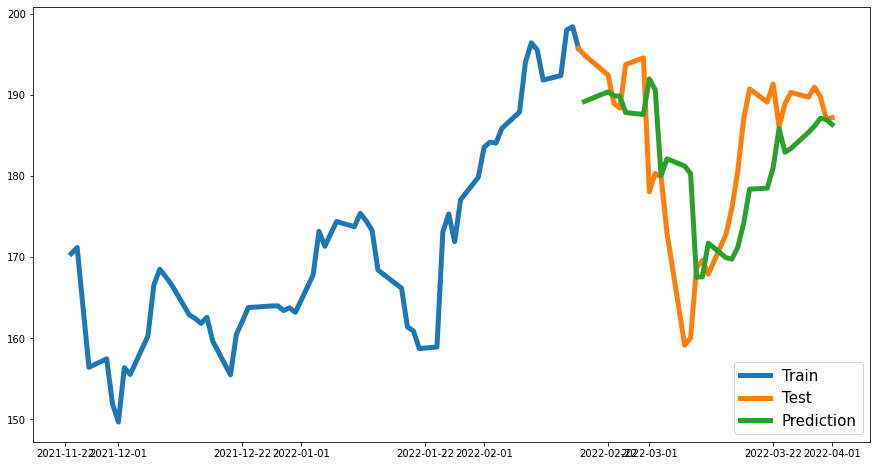

In [59]:
forecast3 = pd.DataFrame(forecast3, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast3, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 4. Machine Learning

In [60]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [61]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781235,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925209,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050964,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581009,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679934,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [62]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
# masterdf = np.log(masterdf).diff(1).dropna()
# masterdf.columns = [colname.replace("price", "return") for colname in masterdf.columns]

In [63]:
masterdf.head(3)

,amex price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,117.484985,1788.199951,0.903310,1.926,23.581009
2019-11-08,117.669014,1785.880005,0.907466,1.933,23.679934
2019-11-11,117.116859,1771.650024,0.907240,1.943,23.650730


In [64]:
import copy

def ts2mldataset(ts, lag=5):
  dflist = []
  df = copy.deepcopy(masterdf)
  df.columns = [colname+"(t)" for colname in df.columns]
  dflist.append(df)

  for ii in range(1, lag+1):
    df = copy.deepcopy(masterdf)
    df.columns = [colname+f"(t-{ii})" for colname in df.columns]

    for jj in range(ii):
      df = df.shift(1)
    dflist.append(df)

  return pd.concat(dflist, axis=1)

In [65]:
mldf = ts2mldataset(masterdf, lag=10)

In [66]:
mldf.dropna(inplace=True)
mldf.shape
mldf.head(3)

(595, 55)

,amex price(t),amazon price(t),euro price(t),treasury price(t),inflation price(t),amex price(t-1),amazon price(t-1),euro price(t-1),treasury price(t-1),inflation price(t-1),...,amex price(t-9),amazon price(t-9),euro price(t-9),treasury price(t-9),inflation price(t-9),amex price(t-10),amazon price(t-10),euro price(t-10),treasury price(t-10),inflation price(t-10)
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-21,115.082573,1734.709961,0.90262,1.772,23.786400,115.566925,1745.530029,0.902527,1.738,23.829741,...,117.669014,1785.880005,0.907466,1.933,23.679934,117.484985,1788.199951,0.903310,1.926,23.581009
2019-11-22,115.334427,1745.719971,0.90368,1.774,23.874018,115.082573,1734.709961,0.902620,1.772,23.786400,...,117.116859,1771.650024,0.907240,1.943,23.650730,117.669014,1785.880005,0.907466,1.933,23.679934
2019-11-25,116.826241,1773.839966,0.90723,1.764,24.087885,115.334427,1745.719971,0.903680,1.774,23.874018,...,117.107162,1778.000000,0.906170,1.909,23.698780,117.116859,1771.650024,0.907240,1.943,23.650730


In [67]:
from pycaret.regression import *
import pandas as pd

In [68]:
# compare_models()

In [69]:
maxlen = len(mldf)
forecast4 = []
from tqdm import tqdm

modelsetup = setup(data = mldf[:maxlen-30], target = 'amex price(t)', 
                  ignore_features = [],normalize = True,
                  transformation= True, transformation_method = 'yeo-johnson', 
                  transform_target = False, remove_outliers= True,
                  remove_multicollinearity = True,
                  ignore_low_variance = True, combine_rare_levels = True, silent=True)
cat_boost = create_model('catboost')
tuned_catboost = tune_model(cat_boost)

for ii in tqdm(range(30)):
  modelsetup = setup(data = mldf[ii:ii+maxlen-30], target = 'amex price(t)', 
                   ignore_features = [],normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = False, remove_outliers= True,
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True, silent=True)
  tuned_catboost = finalize_model(tuned_catboost)
  forecast4.append(tuned_catboost.predict(mldf.iloc[-30+ii]))

,Description,Value
0,session_id,8150
1,Target,amex price(t)
2,Original Data,"(565, 55)"
3,Missing Values,False
4,Numeric Features,54
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(375, 5)"


100%|██████████| 30/30 [01:34<00:00,  3.16s/it]


In [70]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast4, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=15.73


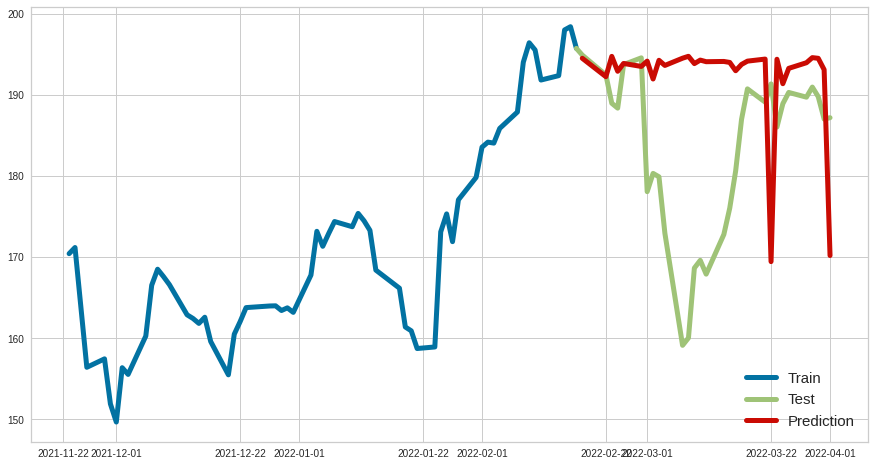

In [74]:
forecast4 = pd.DataFrame(forecast4, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast4, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()